#Cardiovasular Risk Prediction - ML Classification Project


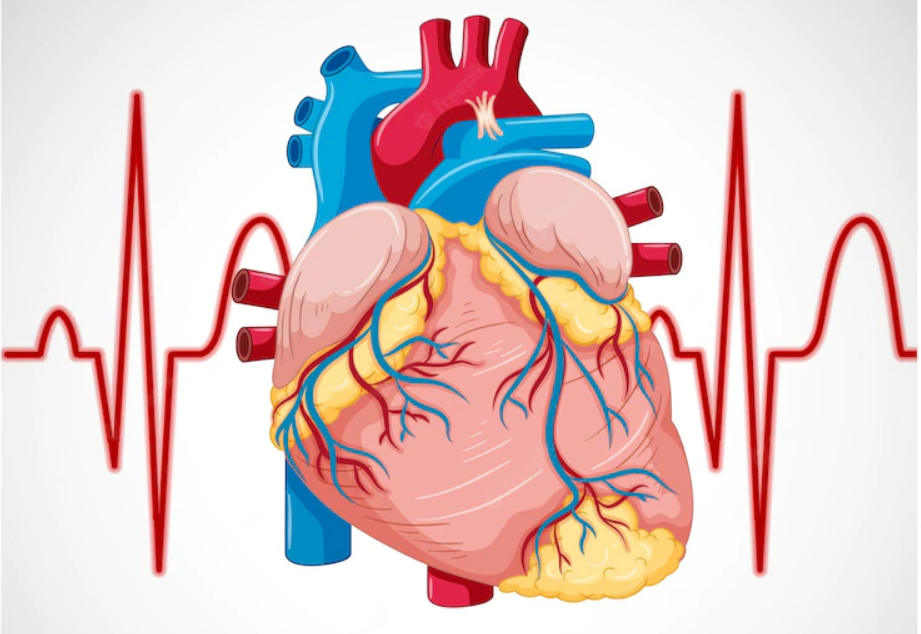


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables: Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.
##Data Description

Demographic
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical(history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Classification - Vikas Chaudhary/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

#Data Preperation

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
#knowing if there is any NaN/Null values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df[(df['cigsPerDay'].isna()) | (df['BPMeds'].isna()) |(df['totChol'].isna()) | (df['BMI'].isna()) | (df['heartRate'].isna()) | (df['glucose'].isna())]['TenYearCHD'].value_counts()

0    332
1     54
Name: TenYearCHD, dtype: int64

In [ ]:
#how many of the individuals are at risk?
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

filling NaN in 'education' feature

In [ ]:
df['education'].fillna(df['education'].median(), inplace = True)

Dealing with 'null'/'nan' values in 'BPMeds' feature

In [ ]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
print(df[df['BPMeds'] == 1.0]['sysBP'].mean())
print(df[df['BPMeds'] == 1.0]['diaBP'].mean())

165.89
96.59


In [ ]:
print("{:.2f}".format(df[df['BPMeds'] == 0.0]['sysBP'].mean()))
print("{:.2f}".format(df[df['BPMeds'] == 0.0]['diaBP'].mean()))

131.47
82.44


Dealing with null/nan values in 'BPmeds' columns
1. The systolic pressure above 140 mm Hg is considered as high and above 180 mm Hg is considered as dangerous.
2. The diastolic pressure above 90 mm Hg is considered as high and above 120 mm Hg is considered as dangerous.

So, it is necessary to take medicine above the dangerous limit. But only 100 out of 3346 are on medication.

In [ ]:
#Filling 'null'/'nan' values in 'BPMeds' column the person with max 'sysBP' and max 'diaBP' will be considered on medication while other on no medication
print(df[df['BPMeds'].isna()]['sysBP'].max())
print(df[df['BPMeds'].isna()]['diaBP'].max())

208.0
136.0


In [ ]:
df[(df['BPMeds'].isna()) & (df['diaBP'] == 136.0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
923,923,52,1.0,F,NO,0.0,NaN,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0


All other missing except the person with 'id' = 923 can be put in no medication.

In [ ]:
#First filling 'NaN' with '0' later 'id'=923 with 0
df['BPMeds'].fillna(df['BPMeds'].median(), inplace = True)

In [ ]:
df[(df['sysBP']==208.0) & (df['diaBP'] == 136.0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
923,923,52,1.0,F,NO,0.0,0.0,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0


Replacing the above 0.0 with 1.0 in 'BPMeds'.

In [ ]:
df.loc[df['id']==923, 'BPMeds'] = 1.0

In [ ]:
df[(df['sysBP']==208.0) & (df['diaBP'] == 136.0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
923,923,52,1.0,F,NO,0.0,1.0,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0


In [ ]:
df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Dealing with 'NaN' values in 'cigsPerDay'feature

In [ ]:
df[df['cigsPerDay'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,2.0,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


Since all the candidate who are smokers we cann't fill the 'NaN' with 0 we need to give some number

In [ ]:
int(df[(df['cigsPerDay']!='NaN') & (df['cigsPerDay']!=0.0)]['cigsPerDay'].mean())

18

18 cigarettes/day is the mean (average) for a smoker so we will fill the NaN values with 18

In [ ]:
#Filling the 'NaN' value in 'cigsPerDay'
df['cigsPerDay'].fillna(int(df[(df['cigsPerDay']!='NaN') & (df['cigsPerDay']!=0.0)]['cigsPerDay'].mean()), inplace=True)

In [ ]:
df[df['cigsPerDay'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


Dealing with 'NaN' Vaues in 'totChol' feature

In [ ]:
df[df['totChol'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
69,69,65,2.0,M,NO,0.0,0.0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.0,0
254,254,52,1.0,F,NO,0.0,0.0,0,0,0,NaN,129.0,83.0,32.57,65.0,NaN,0
290,290,37,2.0,F,YES,30.0,0.0,0,0,0,NaN,115.0,79.0,28.41,85.0,NaN,0
554,554,38,3.0,F,YES,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
625,625,62,2.0,F,YES,30.0,0.0,0,0,0,NaN,153.0,60.0,27.47,60.0,NaN,0
700,700,44,2.0,F,YES,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
732,732,61,1.0,F,NO,0.0,0.0,0,0,0,NaN,115.0,60.0,25.50,76.0,99.0,0
797,797,58,1.0,M,NO,0.0,0.0,0,0,0,NaN,116.5,71.0,27.04,70.0,86.0,0
808,808,47,2.0,F,YES,20.0,0.0,0,0,0,NaN,121.0,70.0,23.09,80.0,83.0,0


Cholesterol and Stroke are related. So, let's explore the cholesterol level of candidates with 'prevalentStroke' = 1 and 'prevalentStroke' = 0

In [ ]:
print('Highest Cholesterol level among the persons with Prevalent Stroke:',df[df['prevalentStroke']==1]['totChol'].max())
print('Lowest Cholesterol level among the persons with Prevalent Stroke:',df[df['prevalentStroke']==1]['totChol'].min())

Highest Cholesterol level among the persons with Prevalent Stroke: 321.0
Lowest Cholesterol level among the persons with Prevalent Stroke: 107.0


Since, the person with the highest cholestrol level i.e. 696 did not has prevalent stroke and with lowest cholestrol level i.e. 107 has prevalent stroke. So, we will replace the 'NaN' values in 'totChol' with median

In [ ]:
#Filling the 'NaN' value in 'totChol'
df['totChol'].fillna(df['totChol'].median(), inplace = True)

In [ ]:
df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
#Filling the 'NaN' values in 'BMI' and 'heartRate'
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['heartRate'].fillna(df['heartRate'].median(), inplace = True)

Now, only 'glucose' has 'NaN' values

Let's explore the 'glucose' column and find the ways to fill the 'NaN' values

In [ ]:
df[df['glucose'].isna()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,234.0,185.0,121.0,35.22,80.0,NaN,0
36,36,46,3.0,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
38,38,41,2.0,F,YES,9.0,1.0,1,1,0,180.0,114.0,70.0,22.41,92.0,NaN,0
55,55,51,2.0,F,NO,0.0,0.0,0,1,0,351.0,134.0,97.5,21.66,100.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,3289,40,2.0,M,YES,10.0,0.0,0,0,0,195.0,110.0,70.0,24.75,79.0,NaN,0
3290,3290,67,1.0,F,NO,0.0,0.0,0,1,0,234.0,173.0,100.0,33.60,60.0,NaN,0
3349,3349,46,2.0,F,NO,0.0,0.0,0,0,0,242.0,129.0,85.0,27.40,80.0,NaN,1
3370,3370,46,1.0,F,YES,30.0,0.0,0,0,0,219.0,107.0,69.0,21.40,66.0,NaN,0


We know that blood glucose is directly related to diabetes and we will try to get some relation between 'diabetes' column and 'glucose' column

In [ ]:
df[(df['glucose'].isna()) & (df['diabetes'])==1]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
798,798,47,3.0,M,NO,0.0,0.0,0,0,1,199.0,161.0,102.0,29.17,58.0,NaN,0
1138,1138,50,3.0,F,YES,9.0,0.0,0,0,1,210.0,134.0,80.0,18.26,64.0,NaN,0
1875,1875,47,1.0,F,YES,25.0,0.0,0,1,1,258.0,195.0,90.0,25.38,86.0,NaN,1


only the above 3 candidates with 'NaN' glucose have diabetes

In [ ]:
df[df['diabetes']==1]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,3164,43,1.0,M,YES,20.0,0.0,0,0,1,309.0,124.0,85.0,26.91,70.0,215.0,0
3212,3212,60,1.0,F,NO,0.0,0.0,0,1,1,282.0,213.0,94.5,28.58,71.0,78.0,0
3232,3232,50,1.0,F,NO,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
3260,3260,43,1.0,F,NO,0.0,0.0,0,1,1,231.0,155.5,99.5,34.95,68.0,274.0,1


The 'NaN' values in 'glucose' will be replace in two ways where candidates with diabetes will get higher glucose level while non-diabetic will get lower glucose level.

In [ ]:
dia_list = list(df[(df['glucose'].isna()) & (df['diabetes'])==1]['id'])

First filling all 'Nan' values with median and later with higher glucose level for the above 'dia_list' candidates.

In [ ]:
df['glucose'].fillna(df['glucose'].median(), inplace = True)

In [ ]:
#Again replacing the value of the 3 candidates
for i in dia_list:
  df.loc[df['id']== i, 'glucose'] = df[df['diabetes']==1]['glucose'].median()

In [ ]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.971681,9.127434,0.029794,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.782006,0.150737
std,978.753033,8.592878,1.005925,11.862159,0.170042,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.244717,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Dropping 'id' column

In [ ]:
df.drop(columns='id', inplace=True)

In [ ]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


#EDA & Feature Engineering

In [ ]:
#dividing features into 'numerical' or 'categorical'
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
categorical_columns = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

In [ ]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

[]

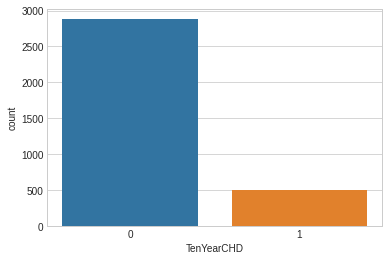

In [ ]:
#defendent feature
sns.countplot(x=df['TenYearCHD'])
plt.plot()

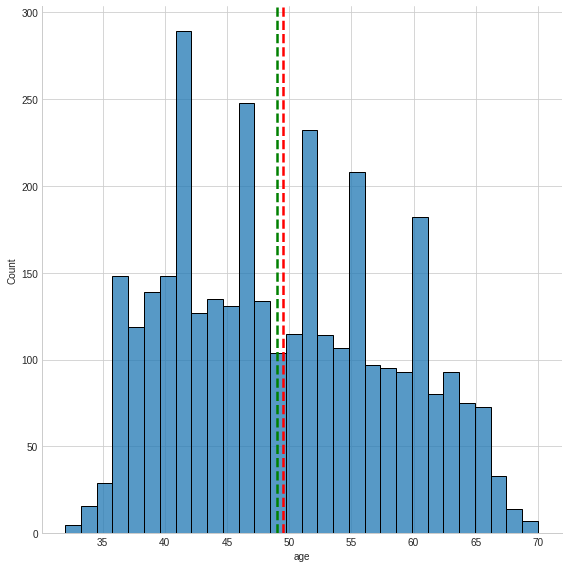

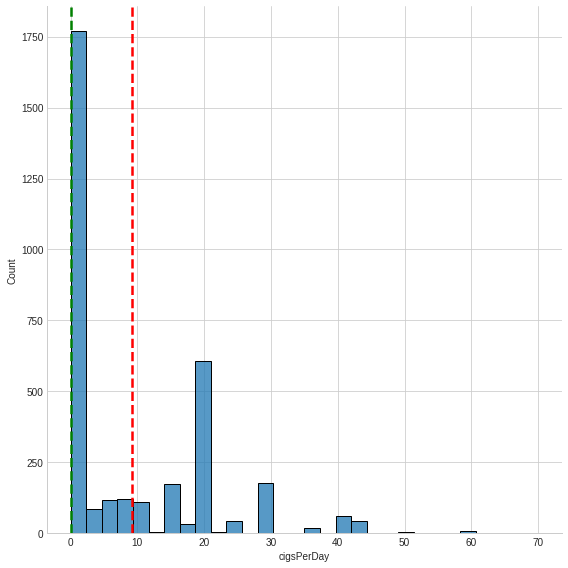

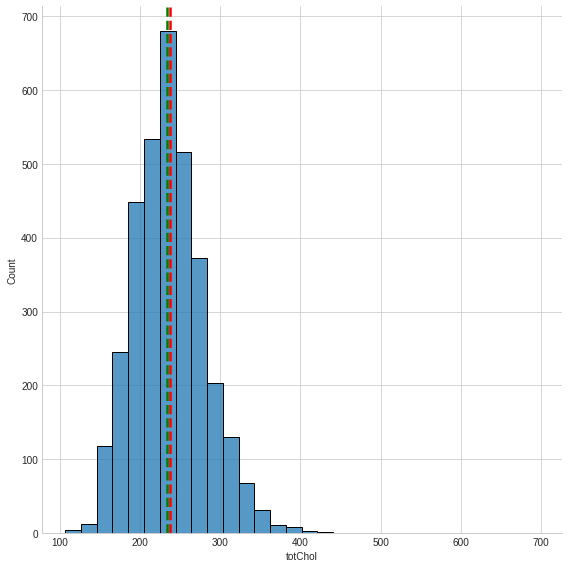

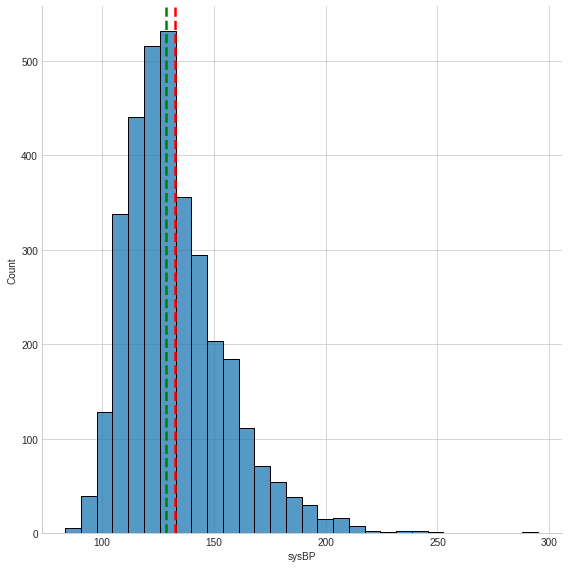

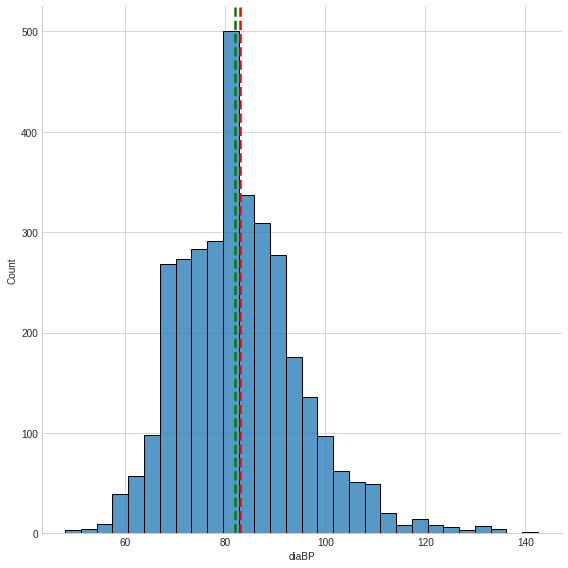

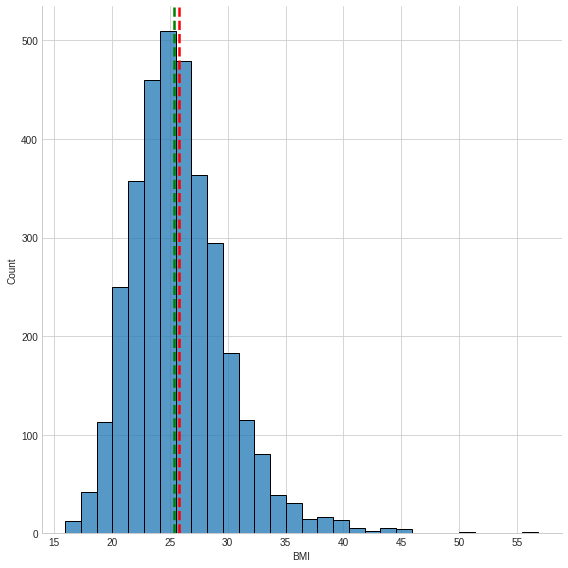

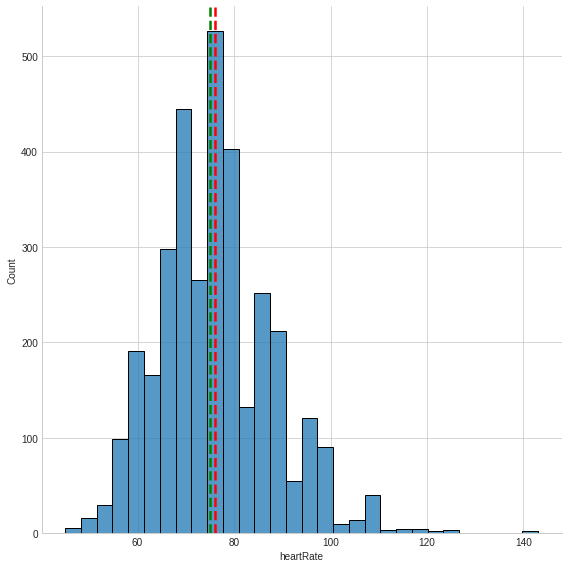

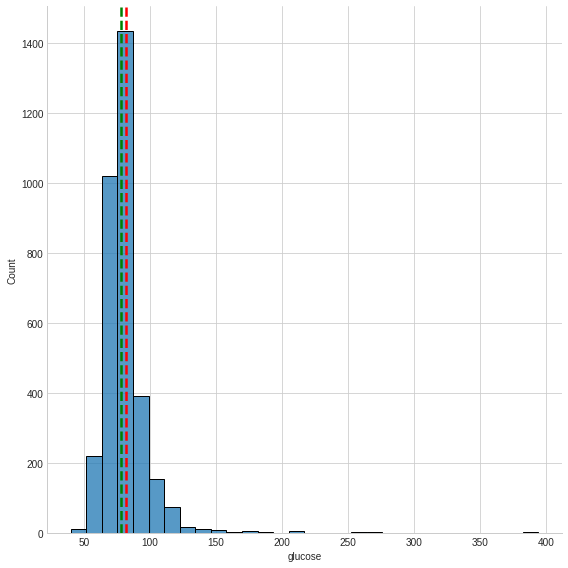

In [ ]:
for i in numerical_columns:
  sns.displot(data=df, x = i, bins=30, height=8)
  plt.axvline(x=df[i].mean(), color='red', ls='--', lw=2.5)
  plt.axvline(x=df[i].median(), color='green',ls='--', lw=2.5)

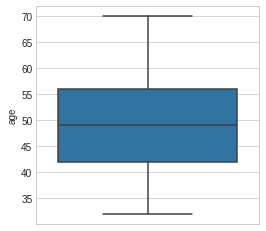

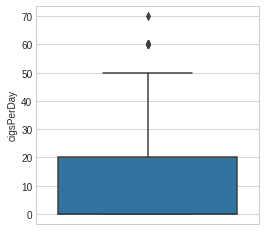

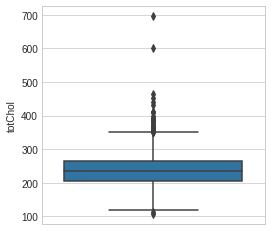

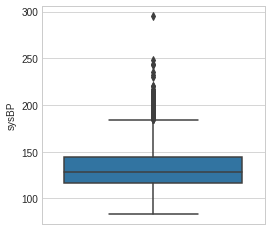

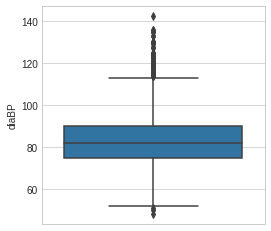

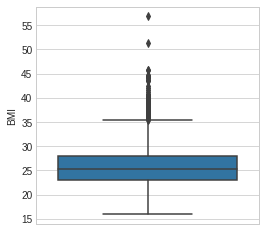

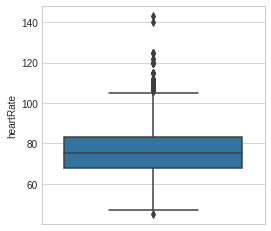

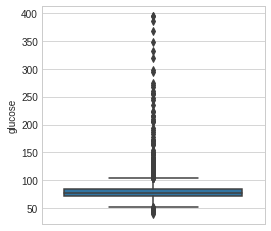

In [ ]:
#outliar detection
for col in numerical_columns:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(y=df[col])
  fig.set_title('')
  fig.set_ylabel(col)
  plt.show()

####Let's us find out if the number which are represented as 'outliars' are actually outliars or not.

In [ ]:
#maximum values in 'cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
for i in numerical_columns[1:]:
  print('Max',i,'-',df[i].max())

Max cigsPerDay - 70.0
Max totChol - 696.0
Max sysBP - 295.0
Max diaBP - 142.5
Max BMI - 56.8
Max heartRate - 143.0
Max glucose - 394.0


###Smoking 70 cigarettes per day/person is rare by it is still possible number.

###"*Extremely high triglyceride levels (more than 1000 mg/dL) can lead to abdominal pain and a life-threatening disorder of the pancreas called pancreatitis*" -- Texasheart.org

###So, 686 mg/dL is not an outliar

In [ ]:
df[df['totChol']== 696]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
512,51,2.0,M,YES,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


In [ ]:
df[df['sysBP']== 295]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1941,64,1.0,F,NO,0.0,0.0,0,1,0,253.0,295.0,135.0,38.82,92.0,70.0,1


###The person with 'systolic BP' of 295 has the prevalent hypertension and has 10 year risk of future coronary heart disease (CHD). This data point is also a genuin one.

In [ ]:
df[df['diaBP']== 142.5]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2325,48,1.0,F,NO,0.0,0.0,0,1,0,169.0,243.0,142.5,28.49,85.0,77.0,0


###'*The highest pressure recorded in an individual was 370/360.*' --- a study on athletes.

Source: https://pubmed.ncbi.nlm.nih.gov/7741618/#:~:text=The%20highest%20pressure%20recorded%20in%20an%20individual%20was%20370%2F360.

###Let's look into BMI

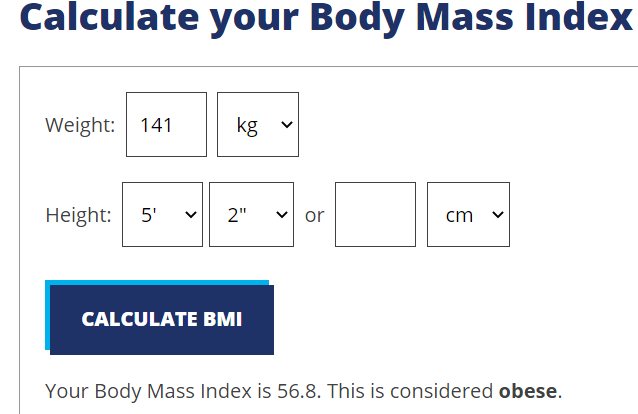

Source: https://www.diabetes.ca/managing-my-diabetes/tools---resources/body-mass-index-(bmi)-calculator#:~:text=How%20to%20calculate%20Body%20Mass,range%20is%2018.5%20to%2024.9.

In [ ]:
df[df['heartRate']== 143]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
556,57,1.0,F,NO,0.0,0.0,0,0,0,257.0,133.0,94.0,17.71,143.0,75.0,0


### Heart Rate of 143 beats per minute is also a genuine data point. Although, in the given dataset the individual has no heart risks. There is a medical condition called 'Supraventricular tachycardia (SVT) where heart rate may be as high as 250 beats per minute, but is usually between 140 and 180.

Source: https://www.nhsinform.scot/illnesses-and-conditions/heart-and-blood-vessels/conditions/supraventricular-tachycardia

In [ ]:
df[df['glucose']== 394]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1032,67,2.0,F,NO,0.0,1.0,0,1,1,303.0,204.0,96.0,27.86,75.0,394.0,1
1587,62,3.0,M,NO,0.0,0.0,0,0,1,346.0,102.5,66.5,17.17,80.0,394.0,1


Both individuals have diabetes

No value is considered as an outlier for further use.

###Smokers Plot

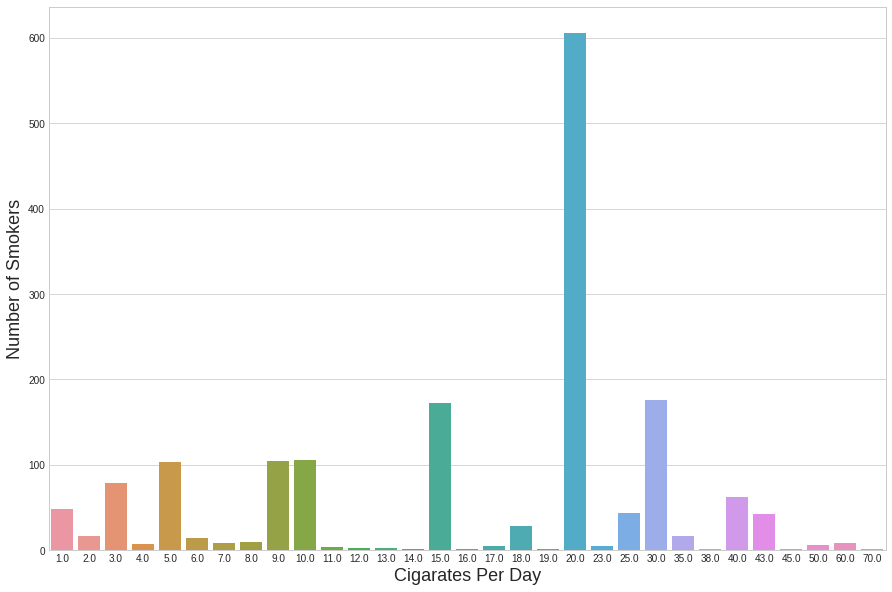

In [ ]:
#Make a plot after excluding non-smokers
plt.figure(figsize=(15,10))
sns.countplot(x=df[df['cigsPerDay']!=0.0]['cigsPerDay'])
plt.xlabel('Cigarates Per Day',fontsize=18)
plt.ylabel('Number of Smokers',fontsize=18)
plt.show()

In [ ]:
#Average cigarettes smoked by a smoker every day
print('The average cigarettes smoked by a smoker per day is:',"{:.2f}".format(df[df['cigsPerDay']!=0.0]['cigsPerDay'].sum()/len(df[df['cigsPerDay']!=0.0])))

The average cigarettes smoked by a smoker per day is: 18.34


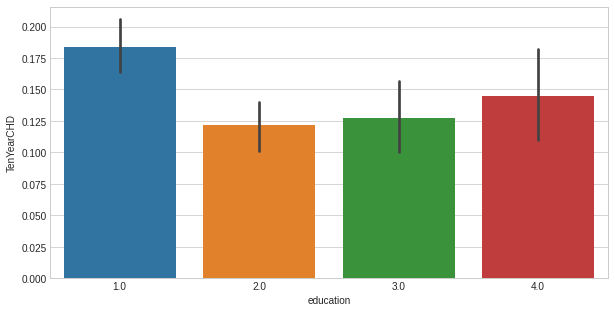

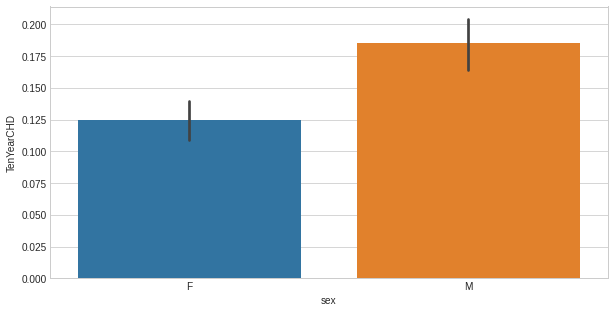

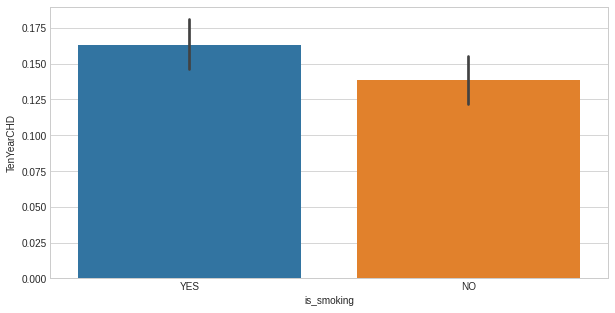

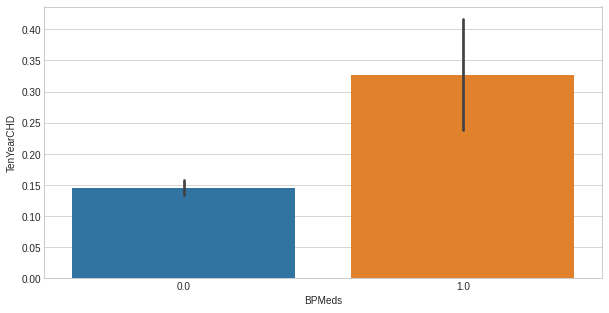

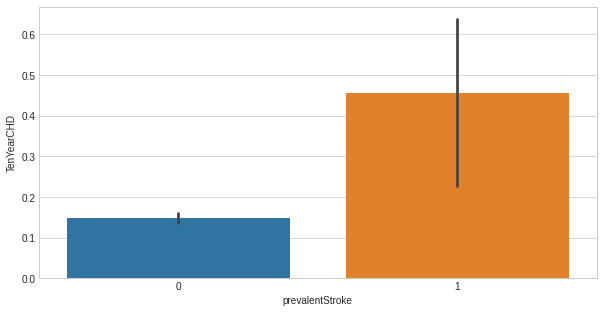

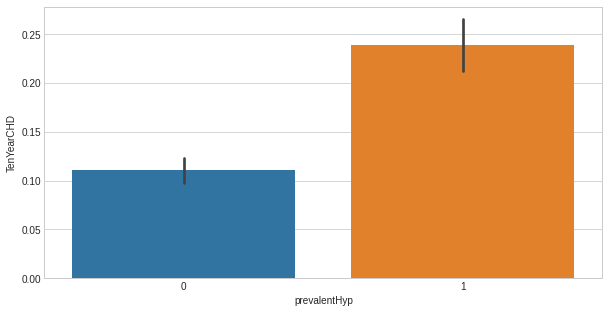

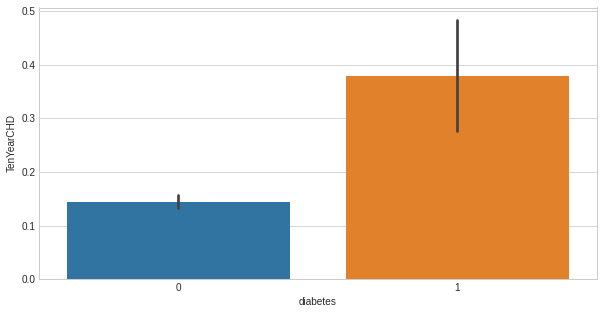

In [ ]:
#plotting the categorical variables
for col in categorical_columns[0:-1]:
  plt.figure(figsize=(10,5))
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=df,x=col,y='TenYearCHD')

###Ploting different graphs to know the cardiovascular disease based in 'Male' and 'Female' category and keeping other conditions same

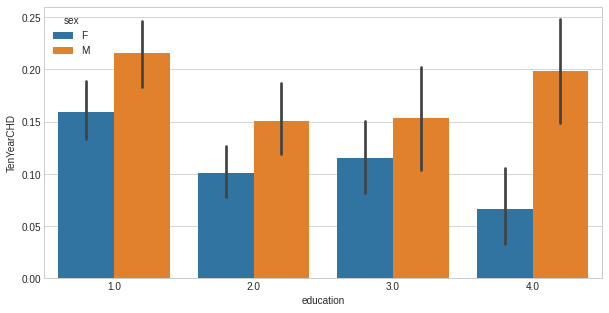

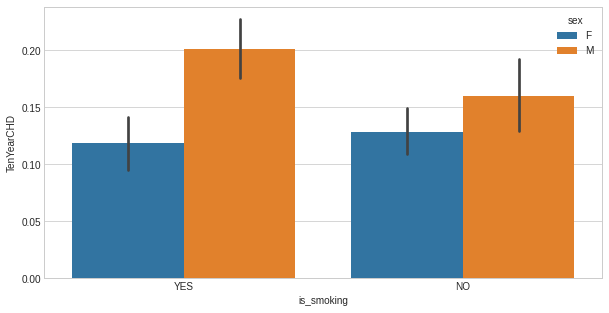

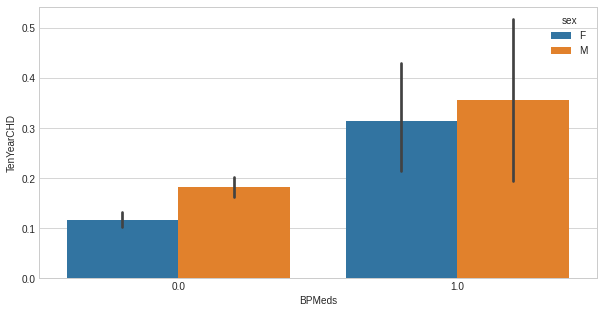

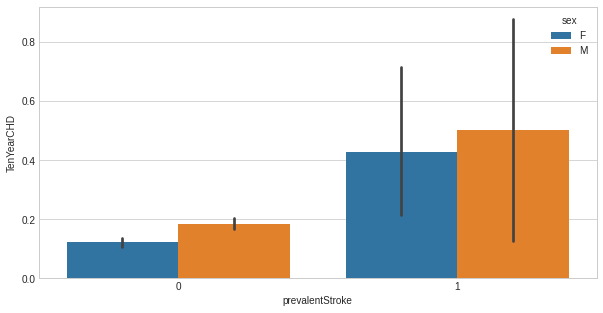

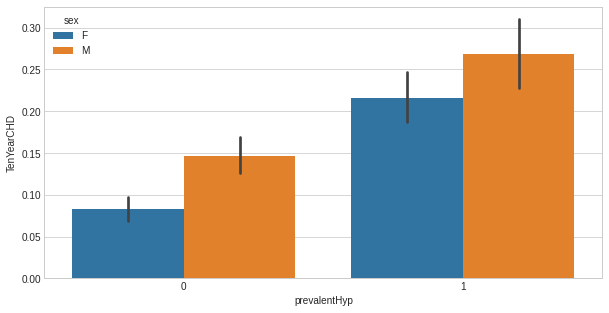

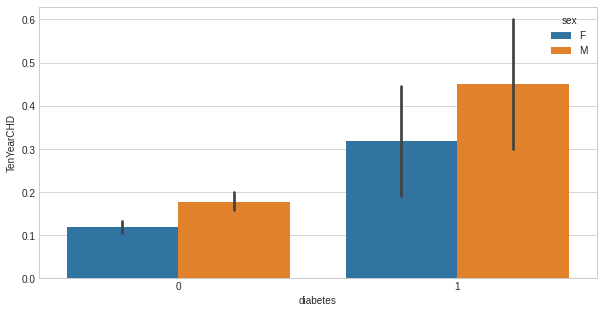

In [ ]:
for i in categorical_columns[0:-1]:
  if i!='sex':
    fig,ax=plt.subplots(figsize=(10,5))
    sns.barplot(data=df,x=i,y='TenYearCHD',hue='sex',ax=ax)

In [ ]:
df.head(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


###Let's compare different individuals and their cardiovascular risk percentage based on different categorical features.

In [ ]:
print('Male or Female:')
print("{:.2f}".format(len(df[(df['sex']=='F') & (df['TenYearCHD']==1)])*100/len(df[df['sex']=='F'])),'% Females are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['sex']=='M') & (df['TenYearCHD']==1)])*100/len(df[df['sex']=='M'])),'% Males are at 10-year risk of coronary heart disease(CHD)')

Male or Female:
12.43 % Females are at 10-year risk of coronary heart disease(CHD)
18.54 % Males are at 10-year risk of coronary heart disease(CHD)


In [ ]:
print('Smoker or Non-Smoker:')
print("{:.2f}".format(len(df[(df['is_smoking']=='YES') & (df['TenYearCHD']==1)])*100/len(df[df['is_smoking']=='YES'])),'% Smokers are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['is_smoking']=='NO') & (df['TenYearCHD']==1)])*100/len(df[df['is_smoking']=='NO'])),'% Non-Smokers are at 10-year risk of coronary heart disease(CHD)')

Smoker or Non-Smoker:
16.30 % Smokers are at 10-year risk of coronary heart disease(CHD)
13.86 % Non-Smokers are at 10-year risk of coronary heart disease(CHD)


In [ ]:
print('On BP Medication or Not on Medication')
print("{:.2f}".format(len(df[(df['BPMeds']==1) & (df['TenYearCHD']==1)])*100/len(df[df['BPMeds']==1])),'% of individuals on BP medication are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['BPMeds']==0) & (df['TenYearCHD']==1)])*100/len(df[df['BPMeds']==0])),'% of individuals not on BP medication are at 10-year risk of coronary heart disease(CHD)')

On BP Medication or Not on Medication
32.67 % of individuals on BP medication are at 10-year risk of coronary heart disease(CHD)
14.53 % of individuals not on BP medication are at 10-year risk of coronary heart disease(CHD)


In [ ]:
print('Prevalent Stroke condition or Not')
print("{:.2f}".format(len(df[(df['prevalentStroke']==1) & (df['TenYearCHD']==1)])*100/len(df[df['prevalentStroke']==1])),'% of individuals with prevalent stroke condition are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['prevalentStroke']==0) & (df['TenYearCHD']==1)])*100/len(df[df['prevalentStroke']==0])),'% of individuals with no prevalent stroke condition are at 10-year risk of coronary heart disease(CHD)')

Prevalent Stroke condition or Not
45.45 % of individuals with prevalent stroke condition are at 10-year risk of coronary heart disease(CHD)
14.88 % of individuals with no prevalent stroke condition are at 10-year risk of coronary heart disease(CHD)


In [ ]:
print('Prevalent Hypertension or Not')
print("{:.2f}".format(len(df[(df['prevalentHyp']==1) & (df['TenYearCHD']==1)])*100/len(df[df['prevalentHyp']==1])),'% of individuals with prevalent hypertension are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['prevalentHyp']==0) & (df['TenYearCHD']==1)])*100/len(df[df['prevalentHyp']==0])),'% of individuals with no prevalent hypertension are at 10-year risk of coronary heart disease(CHD)')

Prevalent Hypertension or Not
23.85 % of individuals with prevalent hypertension are at 10-year risk of coronary heart disease(CHD)
11.03 % of individuals with no prevalent hypertension are at 10-year risk of coronary heart disease(CHD)


In [ ]:
print('Diabetic or Non-diabetic')
print("{:.2f}".format(len(df[(df['diabetes']==1) & (df['TenYearCHD']==1)])*100/len(df[df['diabetes']==1])),'% of diabetic individuals are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['diabetes']==0) & (df['TenYearCHD']==1)])*100/len(df[df['diabetes']==0])),'% of non-diabetic individuals are at 10-year risk of coronary heart disease(CHD)')

Diabetic or Non-diabetic
37.93 % of diabetic individuals are at 10-year risk of coronary heart disease(CHD)
14.47 % of non-diabetic individuals are at 10-year risk of coronary heart disease(CHD)


Creating a dataframe (table) to show the ratio of the individuals at cardiovascular risk with those who are not at risk based on the age groups.

In [ ]:
a = sum(df['age']<=40)
b = sum((df['age']>40) & (df['age']<=50))
c = sum((df['age']>50) & (df['age']<=60))
d = sum((df['age']>60) & (df['age']<=70))

In [ ]:
df_noCHD = df[df['TenYearCHD']==0]
df_yesCDH = df[df['TenYearCHD']==1]

In [ ]:
aN = sum(df_noCHD['age']<=40)
bN = sum((df_noCHD['age']>40) & (df_noCHD['age']<=50))
cN = sum((df_noCHD['age']>50) & (df_noCHD['age']<=60))
dN = sum((df_noCHD['age']>60) & (df_noCHD['age']<=70))

In [ ]:
aY = sum(df_yesCDH['age']<=40)
bY = sum((df_yesCDH['age']>40) & (df_yesCDH['age']<=50))
cY = sum((df_yesCDH['age']>50) & (df_yesCDH['age']<=60))
dY = sum((df_yesCDH['age']>60) & (df_yesCDH['age']<=70))

In [ ]:
#creating an age band to know which age group has the highest risk of attack 
data  = {'age_group':['31-40', '41-50', '51-60', '61-70'], 
         'total_individuals': [a, b, c, d],
         'no_chd_total': [aN, bN, cN, dN],
         'yes_chd_total':[aY, bY, cY, dY],
         'risk_VS_noRisk_ratio':[aY/aN, bY/bN, cY/cN, dY/dN]}
age_df = pd.DataFrame(data)

In [ ]:
age_df

,age_group,total_individuals,no_chd_total,yes_chd_total,risk_VS_noRisk_ratio
0,31-40,604,574,30,0.052265
1,41-50,1283,1144,139,0.121503
2,51-60,1041,834,207,0.248201
3,61-70,462,327,135,0.412844


The risk of heart disease is nearly doubling after every 10 years.

In [ ]:
df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

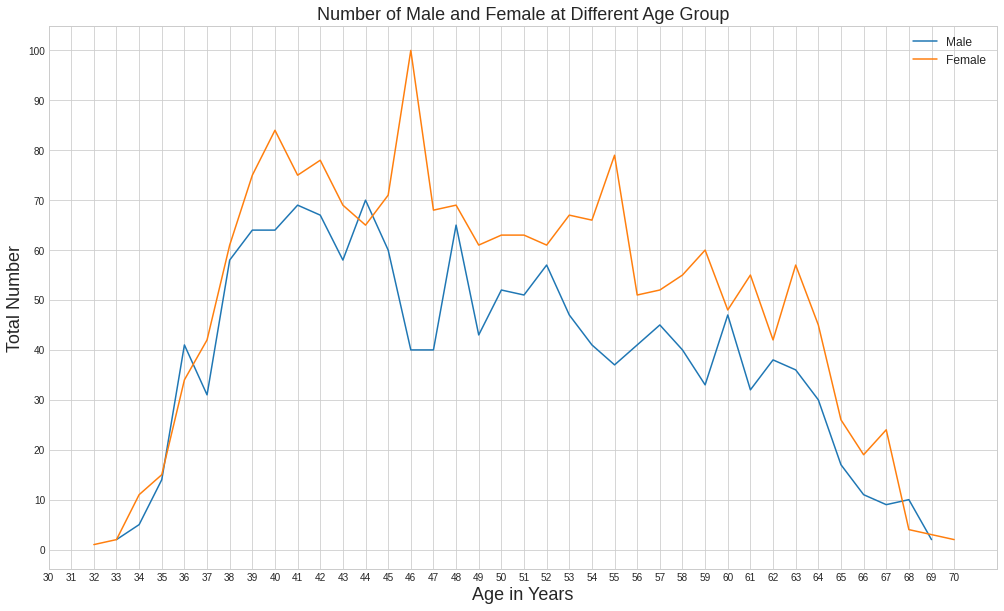

In [ ]:
#line graph to show the number of 'male' and 'female' in the dataframe at different age. 
plt.figure(figsize=(17,10))
plt.plot(df[df['sex']=='M']['age'].value_counts().sort_index())
plt.plot(df[df['sex']=='F']['age'].value_counts().sort_index())
plt.legend(['Male','Female'],fontsize=12)
plt.title("Number of Male and Female at Different Age Group",fontsize=18)
plt.xlabel('Age in Years',fontsize=18)
plt.ylabel('Total Number',fontsize=18)
plt.xticks(np.arange(30,71,1))
plt.yticks(np.arange(0,110,10))
plt.show()

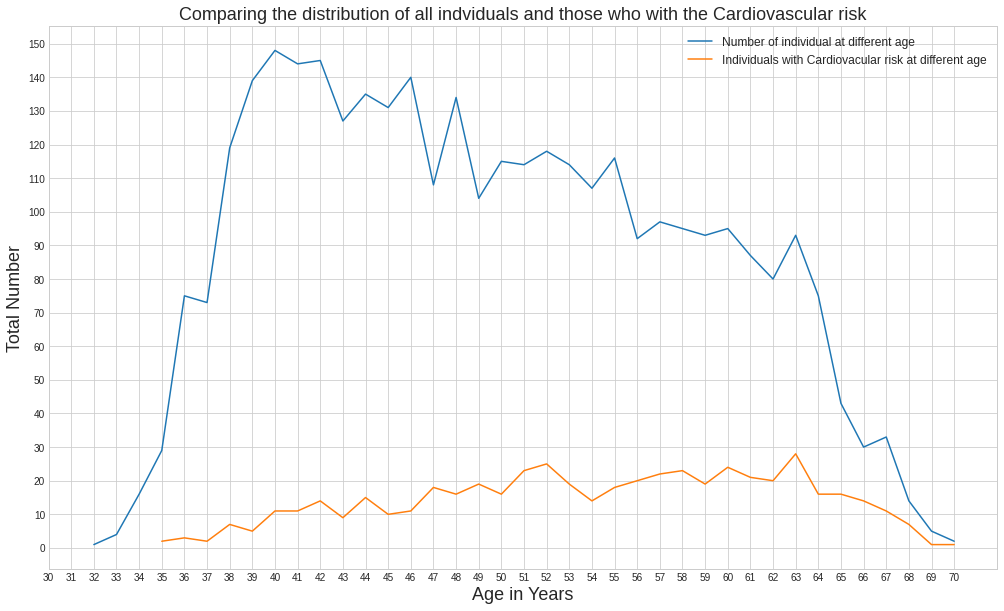

In [ ]:
#Comparing the age of individuals with the age of those who with the Cardiovascular risk
plt.figure(figsize=(17,10))
plt.plot(df['age'].value_counts().sort_index())
plt.plot(df[df['TenYearCHD']==1]['age'].value_counts().sort_index())
plt.legend(['Number of individual at different age','Individuals with Cardiovacular risk at different age'],fontsize=12)
plt.title("Comparing the distribution of all indviduals and those who with the Cardiovascular risk",fontsize=18)
plt.xlabel('Age in Years',fontsize=18)
plt.ylabel('Total Number',fontsize=18)
plt.xticks(np.arange(30,71,1))
plt.yticks(np.arange(0,160,10))
plt.show()

###Let's explore the 'glucose' & 'diabetes' features.

In [ ]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

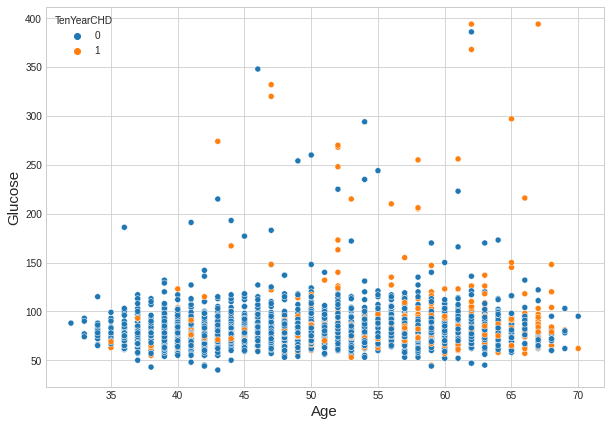

In [ ]:
#Scatter Plot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='glucose', hue='TenYearCHD', data=df)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Glucose',fontsize=15)
plt.show()

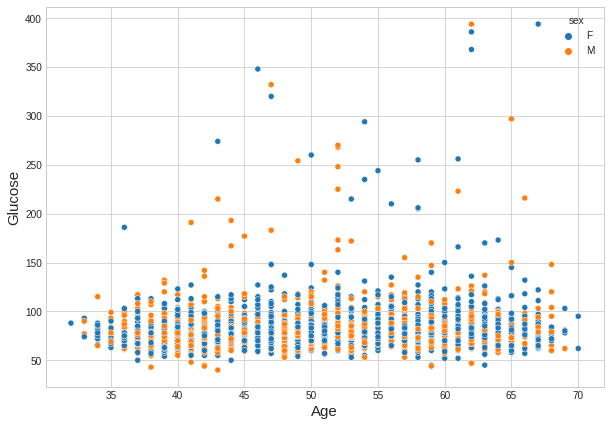

In [ ]:
#Scatter Plot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='glucose', hue='sex', data=df)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Glucose',fontsize=15)
plt.show()

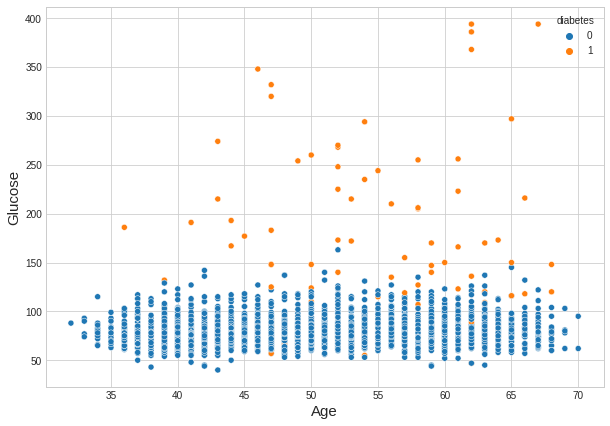

In [ ]:
#Scatter Plot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='glucose', hue='diabetes', data=df)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Glucose',fontsize=15)
plt.show()

###Exploring the 'heartRate' feature

In [ ]:
df['heartRate'].value_counts().sort_index()

45.0      1
47.0      1
48.0      4
50.0     15
51.0      1
         ..
120.0     5
122.0     2
125.0     3
140.0     1
143.0     1
Name: heartRate, Length: 68, dtype: int64

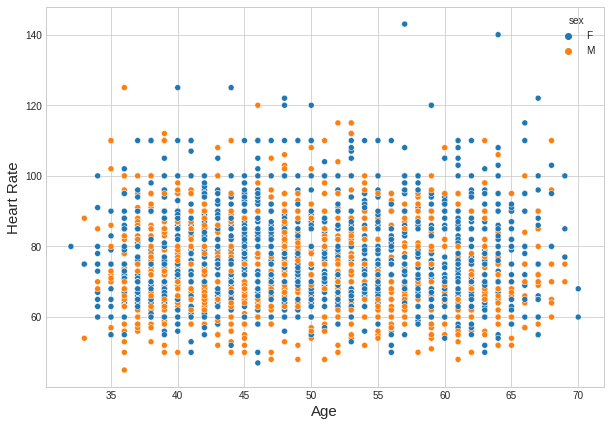

In [ ]:
#Scatter Plot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='heartRate', hue='sex', data=df)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Heart Rate',fontsize=15)
plt.show()

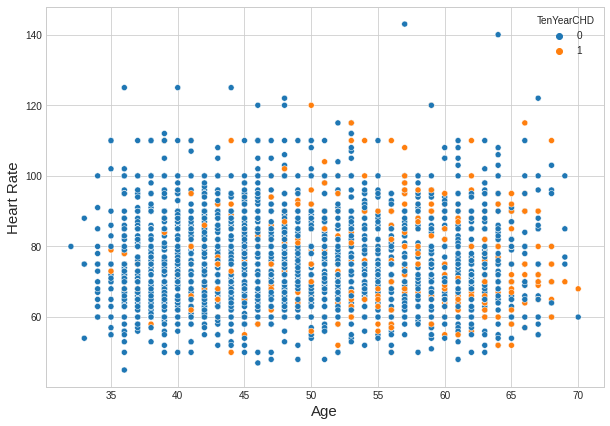

In [ ]:
#Scatter Plot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=df)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Heart Rate',fontsize=15)
plt.show()

###Exploring 'BMI'

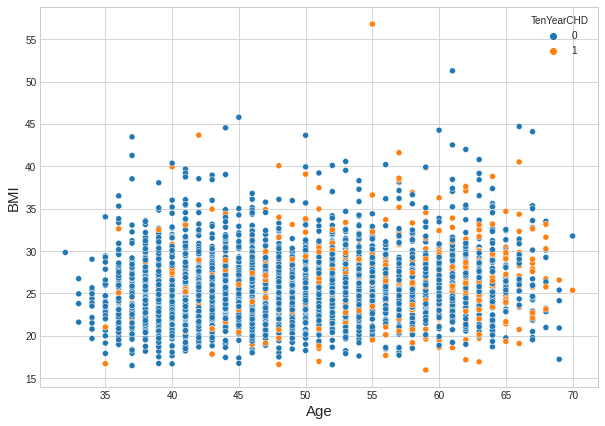

In [ ]:
#scatterplot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='BMI', hue='TenYearCHD', data=df)
plt.xlabel('Age',fontsize=15)
plt.ylabel('BMI',fontsize=15)
plt.show()

Encoding 'sex' and 'is_smoking' features

In [ ]:
# Defining a label encoder
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df = df.replace(encoder)

In [ ]:
df_copy = df.copy()
df_copy

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
df_copy.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

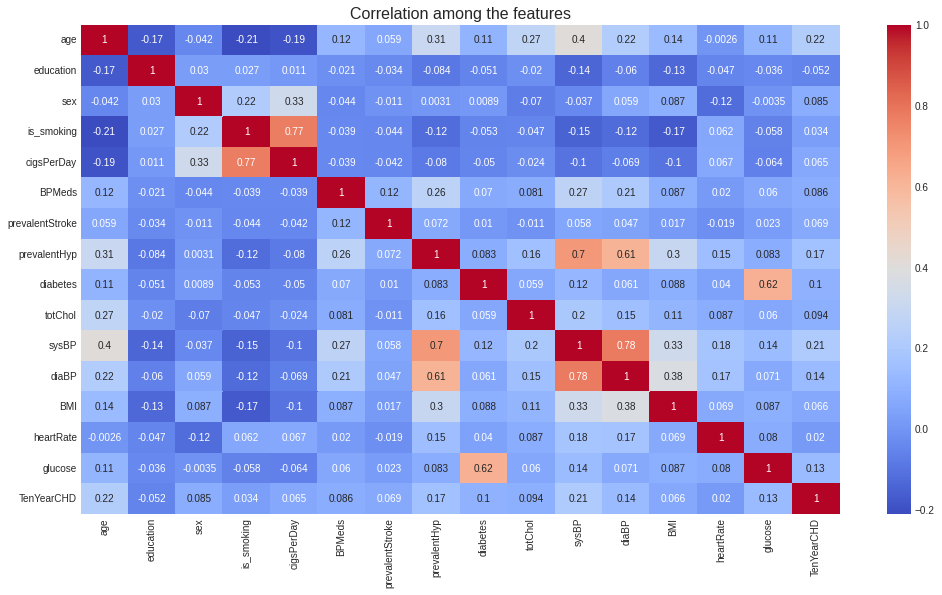

In [ ]:
#Heatmap for co-relation in features
plt.figure(figsize=(17, 9))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation among the features', size=16)
plt.show()

###We can merge some features and drop some features to reduce the collinearity.

In [ ]:
#dropping 'is_smoking' since 'cigsPerDay' can do the same 
df_copy.drop(columns='is_smoking', inplace = True)

In [ ]:
df_copy.head(3)

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [ ]:
df_copy['pulse_pressure'] = df_copy['sysBP'] - df_copy['diaBP']

In [ ]:
df_copy.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
0,64,2.0,0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,63.0
1,36,4.0,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,70.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,45.0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,70.0
4,64,1.0,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,51.5


In [ ]:
#we can drop 'sysBP' and 'diaBP'
df_copy.drop(columns=['sysBP','diaBP'], inplace = True)

In [ ]:
df_copy.head(3)

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
0,64,2.0,0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,63.0
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,70.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,45.0


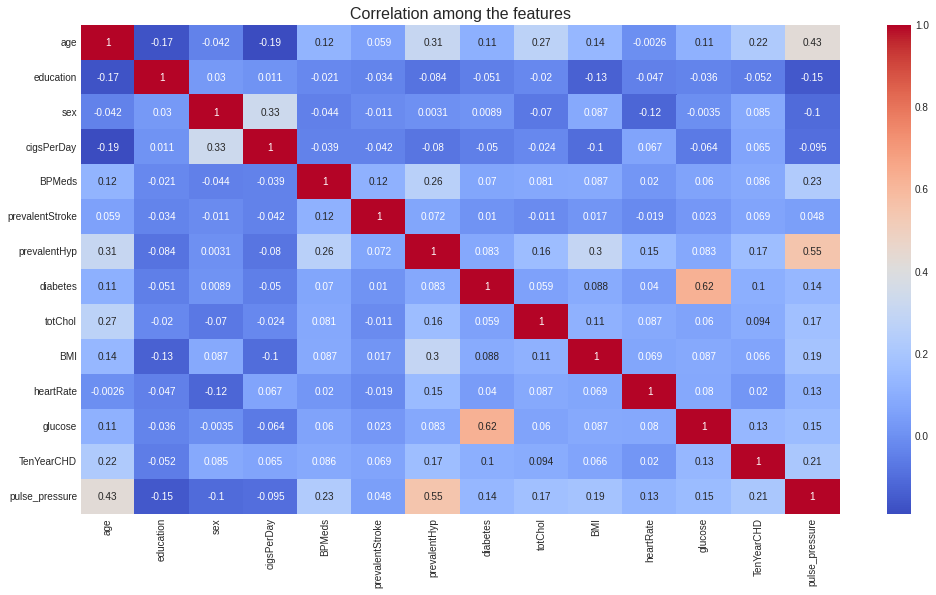

In [ ]:
#Heatmap for co-relation in features
plt.figure(figsize=(17, 9))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation among the features', size=16)
plt.show()

In [ ]:
df_copy = pd.get_dummies(df_copy , columns = ['education'])

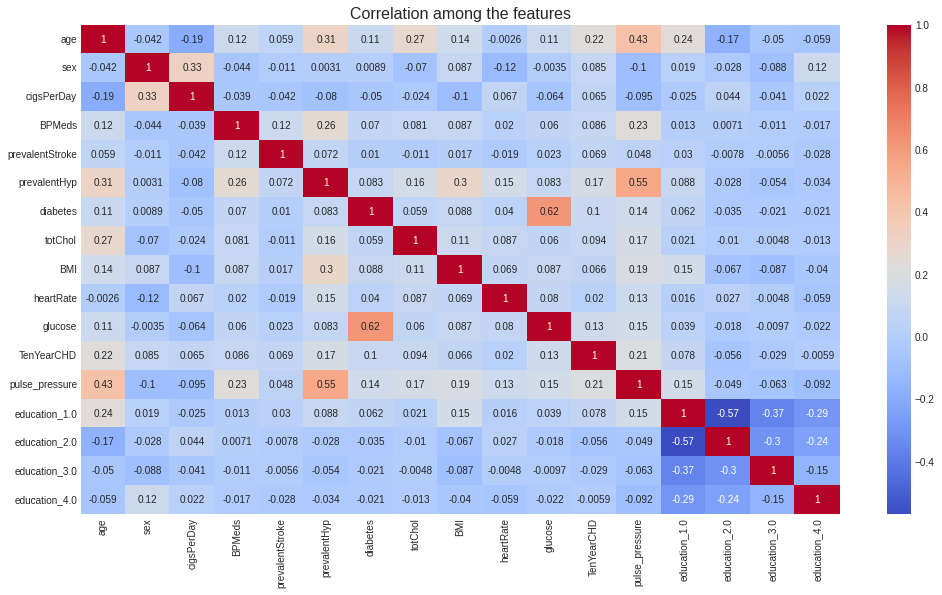

In [ ]:
#Heatmap for co-relation in features
plt.figure(figsize=(17, 9))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation among the features', size=16)
plt.show()

In [ ]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


#Model Building

In [ ]:
df_copy.shape

(3390, 17)

In [ ]:
df_copy['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
#getting a list of independent features
features = [i for i in df_copy.columns if i not in ['TenYearCHD']]
print(features)

['age', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulse_pressure', 'education_1.0', 'education_2.0', 'education_3.0', 'education_4.0']


Using SMOTE (Synthetic Minority Oversampling Technique) to oversample the classes.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
X = df_copy.drop(columns='TenYearCHD')
y = df_copy['TenYearCHD']


In [ ]:
X.shape

(3390, 16)

In [ ]:
y.shape

(3390,)

In [ ]:
X,y = smote.fit_resample(X,y)

In [ ]:
print(X.shape)
print(y.shape)

(5758, 16)
(5758,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X

array([[0.84210526, 0.        , 0.04285714, ..., 1.        , 0.        ,
        0.        ],
       [0.10526316, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.36842105, 0.        , 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47368421, 1.        , 0.796677  , ..., 1.        , 0.        ,
        0.        ],
       [0.42105263, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21052632, 1.        , 0.60696898, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

##1. K-Nearest Neighbors

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

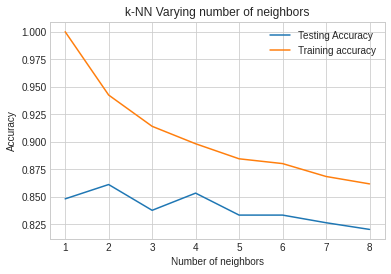

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
clf_knn = KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Fit the model
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
clf_knn.score(X_test,y_test)

0.8203125

In [ ]:
y_predtrain_knn = clf_knn.predict(X_train)
y_predtest_knn = clf_knn.predict(X_test)

In [ ]:
#Train and Test Accuracy

print(f'Train Accuracy = {accuracy_score(y_train, y_predtrain_knn)}')
print(f'Test Accuracy = {accuracy_score(y_test, y_predtest_knn)}')

Train Accuracy = 0.8617021276595744
Test Accuracy = 0.8203125


[[2069  208]
 [ 429 1900]]


Text(0.5, 1.0, 'Confusion Matrix for Train Dataset')

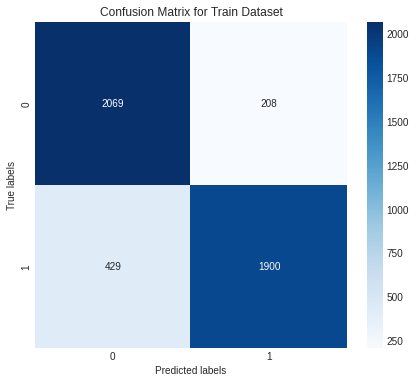

In [ ]:
# Get the confusion matrix for train dataset


cm = confusion_matrix(y_train, y_predtrain_knn)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap = 'Blues', ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Train Dataset')

In [ ]:
print(classification_report(y_train, y_predtrain_knn))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2277
           1       0.90      0.82      0.86      2329

    accuracy                           0.86      4606
   macro avg       0.86      0.86      0.86      4606
weighted avg       0.87      0.86      0.86      4606



[[527  75]
 [132 418]]


Text(0.5, 1.0, 'Confusion Matrix for Test Dataset')

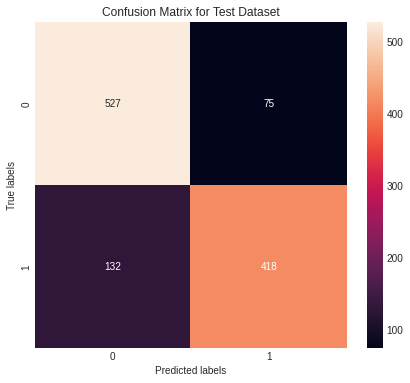

In [ ]:
# Get the confusion matrix for test dataset


cm = confusion_matrix(y_test, y_predtest_knn)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test Dataset')


In [ ]:
print(classification_report(y_test, y_predtest_knn))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       602
           1       0.85      0.76      0.80       550

    accuracy                           0.82      1152
   macro avg       0.82      0.82      0.82      1152
weighted avg       0.82      0.82      0.82      1152



###Hyper-parameter Tuning using GridSearchCV

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_params_

{'n_neighbors': 2}

In [ ]:
knn_cv.score(X_test,y_test)

0.8611111111111112

In [ ]:
y_train_knn_cv = knn_cv.predict(X_train)
y_test_knn_cv = knn_cv.predict(X_test)

In [ ]:
#Train and Test Accuracy after hyper-parameter tuning

print(f'Train Accuracy = {accuracy_score(y_train, y_train_knn_cv)}')
print(f'Test Accuracy = {accuracy_score(y_test, y_test_knn_cv)}')

Train Accuracy = 0.9424663482414243
Test Accuracy = 0.8611111111111112


[[2277    0]
 [ 265 2064]]


Text(0.5, 1.0, 'Confusion Matrix Train Dataset')

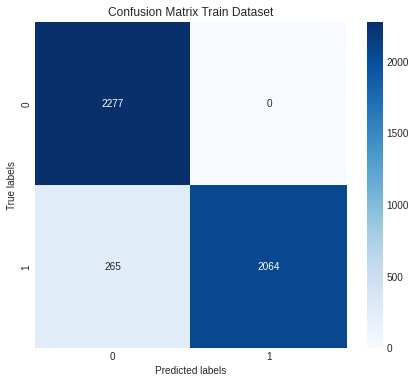

In [ ]:
# Get the confusion matrix for train dataset


cm = confusion_matrix(y_train, y_train_knn_cv)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap = 'Blues', ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Train Dataset')


In [ ]:
print(classification_report(y_train, y_train_knn_cv))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2277
           1       1.00      0.89      0.94      2329

    accuracy                           0.94      4606
   macro avg       0.95      0.94      0.94      4606
weighted avg       0.95      0.94      0.94      4606



[[550  52]
 [108 442]]


Text(0.5, 1.0, 'Confusion Matrix')

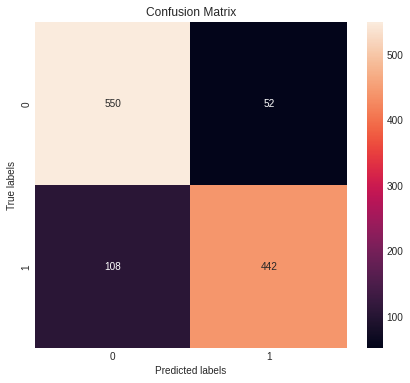

In [ ]:
# Get the confusion matrix for test dataset


cm = confusion_matrix(y_test, y_test_knn_cv)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


In [ ]:
print(classification_report(y_test, y_test_knn_cv))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       602
           1       0.89      0.80      0.85       550

    accuracy                           0.86      1152
   macro avg       0.87      0.86      0.86      1152
weighted avg       0.86      0.86      0.86      1152



##2. Decision Tree Classifier

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#predicting test set
y_predtrain_dt = clf_dt.predict(X_train)
y_predtest_dt = clf_dt.predict(X_test)

In [ ]:
#Train and Test Accuracy

print(f'Train Accuracy = {accuracy_score(y_train, y_predtrain_dt)}')
print(f'Test Accuracy = {accuracy_score(y_test, y_predtest_dt)}')

Train Accuracy = 1.0
Test Accuracy = 0.8177083333333334


[[2277    0]
 [   0 2329]]


Text(0.5, 1.0, 'Confusion Matrix')

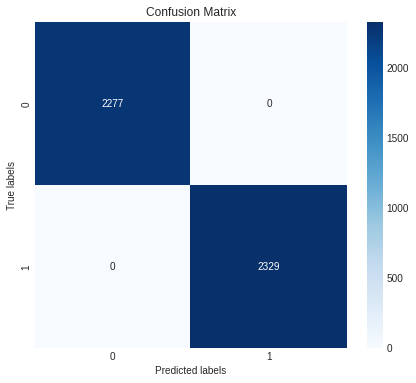

In [ ]:
# Get the confusion matrix for both train and test


cm = confusion_matrix(y_train, y_predtrain_dt)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap = 'Blues', ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


In [ ]:
#classification report for train dataset
print(classification_report(y_train, y_predtrain_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2277
           1       1.00      1.00      1.00      2329

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



[[475 127]
 [ 83 467]]


Text(0.5, 1.0, 'Confusion Matrix')

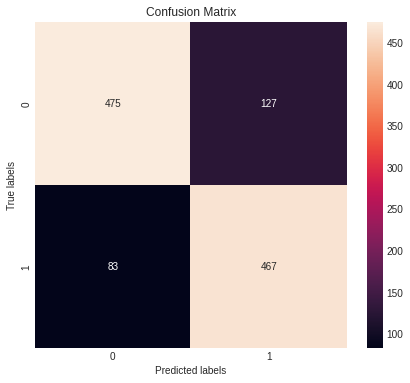

In [ ]:
# Get the confusion matrix for both train and test


cm = confusion_matrix(y_test, y_predtest_dt)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


In [ ]:
#classification report for test dataset
print(classification_report(y_test, y_predtest_dt))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       602
           1       0.79      0.85      0.82       550

    accuracy                           0.82      1152
   macro avg       0.82      0.82      0.82      1152
weighted avg       0.82      0.82      0.82      1152



In [ ]:
#important features
importance = clf_dt.feature_importances_

In [ ]:
indices = np.argsort(importance)
indices = indices[::-1]

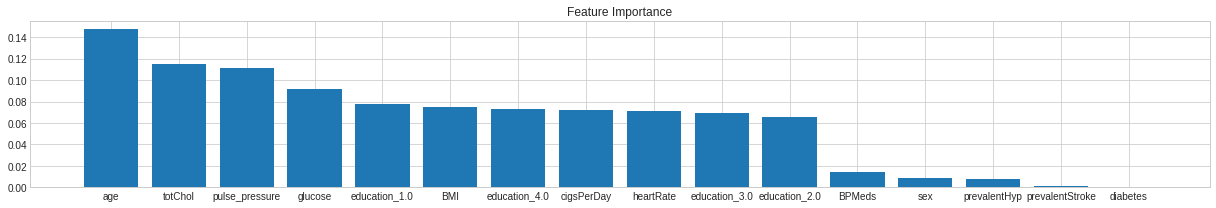

In [ ]:
plt.figure(figsize=(17,3))
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()

##3. Logistic Regression Classifier

In [ ]:
clf_lr = LogisticRegression(fit_intercept=True, max_iter=10000)
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_predtrain_lr = clf_lr.predict(X_train)
y_predtest_lr = clf_lr.predict(X_test)

In [ ]:
print(f'Train Accuracy = {accuracy_score (y_train, y_predtrain_lr)}')
print(f'Test Accuracy = {accuracy_score (y_test, y_predtest_lr)}')

Train Accuracy = 0.7922275293095962
Test Accuracy = 0.7803819444444444


[[2003  274]
 [ 683 1646]]


Text(0.5, 1.0, 'Confusion Matrix')

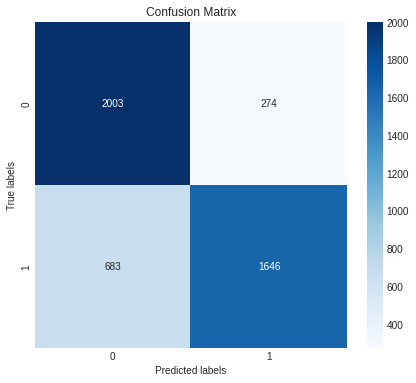

In [ ]:
# Get the confusion matrix for train dataset


cm = confusion_matrix(y_train, y_predtrain_lr)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap = 'Blues', ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


In [ ]:
print(classification_report(y_train, y_predtrain_lr))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      2277
           1       0.86      0.71      0.77      2329

    accuracy                           0.79      4606
   macro avg       0.80      0.79      0.79      4606
weighted avg       0.80      0.79      0.79      4606



[[522  80]
 [173 377]]


Text(0.5, 1.0, 'Confusion Matrix')

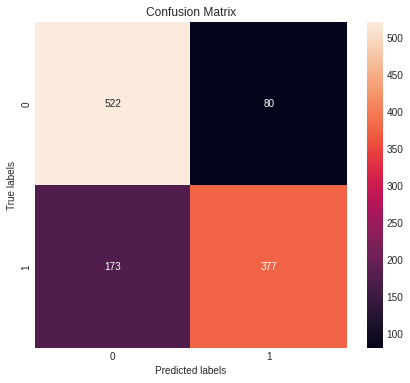

In [ ]:
# Get the confusion matrix for test dataset


cm = confusion_matrix(y_test, y_predtest_lr)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


In [ ]:
print(classification_report(y_test, y_predtest_lr))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       602
           1       0.82      0.69      0.75       550

    accuracy                           0.78      1152
   macro avg       0.79      0.78      0.78      1152
weighted avg       0.79      0.78      0.78      1152



In [ ]:
#importance = clf_lr.feature_importances_
importance = np.abs(clf_lr.coef_[0])
feature = features

In [ ]:
indices = np.argsort(importance)
indices = indices[::-1]

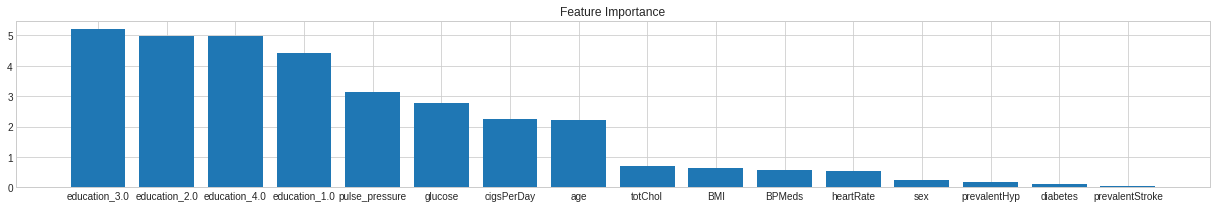

In [ ]:
plt.figure(figsize=(17,3))
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()

###Cross-validated Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression()

In [ ]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.793, test=0.787) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.793, test=0.786) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.797, test=0.780) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.790, test=0.794) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.789, test=0.807) total time=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [ ]:
scores['train_accuracy']

array([0.79261672, 0.79348711, 0.7972863 , 0.79023066, 0.78887381])

In [ ]:
scores['test_accuracy']

array([0.78741866, 0.78610206, 0.7795874 , 0.7937025 , 0.80673181])

In [ ]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [ ]:
for model in scores['estimator']:
    print(model.coef_)

[[ 2.19380955 -0.22429855  2.12307916  0.64433002  0.38814823 -0.13224476
  -0.07657493  0.49603726  0.5275617  -0.48550185  2.41514601  3.06882789
  -4.24704071 -4.80189658 -5.0208981  -4.74935046]]
[[ 2.14524724 -0.30892246  2.38677556  0.44499726 -0.18699048 -0.0572284
   0.11245881  0.7644311   0.62876061 -0.69424355  2.51594878  2.66764253
  -4.22203557 -4.79519921 -5.02251907 -4.75130658]]
[[ 2.25278676 -0.21542914  2.11055859  0.74271275  0.34797455 -0.21441791
  -0.10588847  0.57590798  0.67623964 -0.49089661  2.73870768  3.02352543
  -4.22715033 -4.86704015 -4.99309187 -4.71093535]]
[[ 2.24865409 -0.14368604  2.15388373  0.45627467 -0.13482004 -0.16392089
  -0.12614561  0.92559378  0.50142417 -0.03366365  2.72101253  3.15414853
  -4.22486189 -4.74313475 -4.99583929 -4.83785087]]
[[ 2.11969425 -0.28389974  2.26489568  0.6101905  -0.3470545  -0.18060535
  -0.10330458  0.59495846  0.81360625 -0.81007011  2.43279024  3.20398546
  -4.20541467 -4.78284956 -4.95917264 -4.76812548]]


##4. Naive Bayes Classifier

In [ ]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_predtrain_nb = clf_nb.predict(X_train)
y_predtest_nb = clf_nb.predict(X_test)

In [ ]:
print(f'Train Accuracy = {accuracy_score(y_train, y_predtrain_nb)}')
print(f'Test Accuracy = {accuracy_score(y_test, y_predtest_nb)}')

Train Accuracy = 0.7134172818063396
Test Accuracy = 0.7118055555555556


[[1741  536]
 [ 784 1545]]


Text(0.5, 1.0, 'Confusion Matrix for Train Dataset')

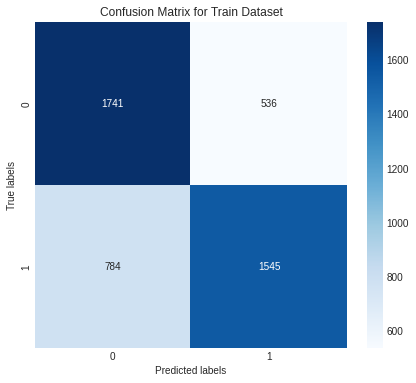

In [ ]:
# Get the confusion matrix for both train and test


cm = confusion_matrix(y_train, y_predtrain_nb)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap = 'Blues', ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Train Dataset')


In [ ]:
print(classification_report(y_train, y_predtrain_nb))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73      2277
           1       0.74      0.66      0.70      2329

    accuracy                           0.71      4606
   macro avg       0.72      0.71      0.71      4606
weighted avg       0.72      0.71      0.71      4606



[[459 143]
 [189 361]]


Text(0.5, 1.0, 'Confusion Matrix for Test Dataset')

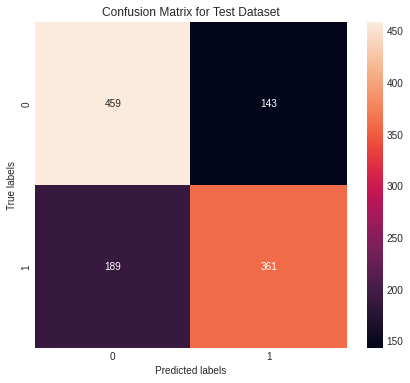

In [ ]:
# Get the confusion matrix for test dataset


cm = confusion_matrix(y_test, y_predtest_nb)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test Dataset')


In [ ]:
print(classification_report(y_test, y_predtest_nb))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       602
           1       0.72      0.66      0.69       550

    accuracy                           0.71      1152
   macro avg       0.71      0.71      0.71      1152
weighted avg       0.71      0.71      0.71      1152



##5. Support Vector Classifier (SVC)

In [ ]:
clf_svc = SVC(probability=True)
clf_svc.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_predtrain_svc = clf_svc.predict(X_train)
y_predtest_svc = clf_svc.predict(X_test)

In [ ]:
#Train and Test Accuracy
print(f'Train Accuracy = {accuracy_score(y_train, y_predtrain_svc)}')
print(f'Test Accuracy = {accuracy_score(y_test, y_predtest_svc)}')

Train Accuracy = 0.7993920972644377
Test Accuracy = 0.7881944444444444


[[2071  206]
 [ 718 1611]]


Text(0.5, 1.0, 'Confusion Matrix for Train Dataset')

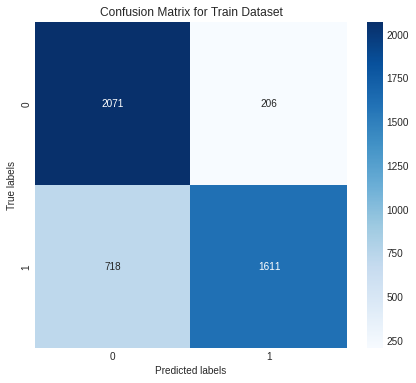

In [ ]:
# Get the confusion matrix for train dataset


cm = confusion_matrix(y_train, y_predtrain_svc)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap = 'Blues', ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Train Dataset')

In [ ]:
print(classification_report(y_train, y_predtrain_svc))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82      2277
           1       0.89      0.69      0.78      2329

    accuracy                           0.80      4606
   macro avg       0.81      0.80      0.80      4606
weighted avg       0.82      0.80      0.80      4606



[[546  56]
 [188 362]]


Text(0.5, 1.0, 'Confusion Matrix for Test Dataset')

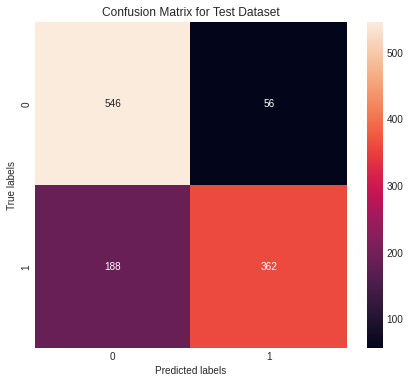

In [ ]:
# Get the confusion matrix for test dataset


cm = confusion_matrix(y_test, y_predtest_svc)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test Dataset')


In [ ]:
print(classification_report(y_test, y_predtest_svc))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       602
           1       0.87      0.66      0.75       550

    accuracy                           0.79      1152
   macro avg       0.80      0.78      0.78      1152
weighted avg       0.80      0.79      0.78      1152



##6. Random Forest Classifier

In [ ]:
clf_rf = RandomForestClassifier(n_estimators = 100, min_impurity_decrease = 0.01, max_depth = 5)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_impurity_decrease=0.01)

In [ ]:
y_predtrain_rf = clf_rf.predict(X_train)
y_predtest_rf = clf_rf.predict(X_test)

In [ ]:
#Train and Test Accuracy
print(f'Train Accuracy = {accuracy_score (y_train, y_predtrain_rf)}')
print(f'Test Accuracy = {accuracy_score (y_test, y_predtest_rf)}')

Train Accuracy = 0.7166739036039947
Test Accuracy = 0.6753472222222222


[[1559  718]
 [ 587 1742]]


Text(0.5, 1.0, 'Confusion Matrix for Train Dataset ')

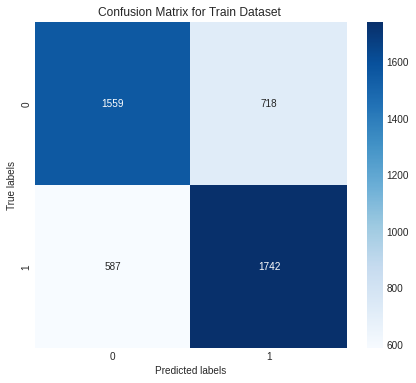

In [ ]:
# Get the confusion matrix for train dataset


cm = confusion_matrix(y_train, y_predtrain_rf)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap = 'Blues', ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Train Dataset ')

In [ ]:
print(classification_report(y_train, y_predtrain_rf))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      2277
           1       0.71      0.75      0.73      2329

    accuracy                           0.72      4606
   macro avg       0.72      0.72      0.72      4606
weighted avg       0.72      0.72      0.72      4606



[[383 219]
 [155 395]]


Text(0.5, 1.0, 'Confusion Matrix for Test Dataset')

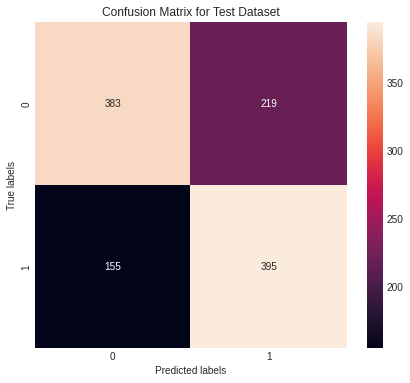

In [ ]:
# Get the confusion matrix for test dataset


cm = confusion_matrix(y_test, y_predtest_rf)
print(cm)
plt.figure(figsize=(7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test Dataset')

In [ ]:
print(classification_report(y_test, y_predtest_rf))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       602
           1       0.64      0.72      0.68       550

    accuracy                           0.68      1152
   macro avg       0.68      0.68      0.68      1152
weighted avg       0.68      0.68      0.68      1152



In [ ]:
#important features
importance = clf_rf.feature_importances_

In [ ]:
indices = np.argsort(importance)
indices = indices[::-1]

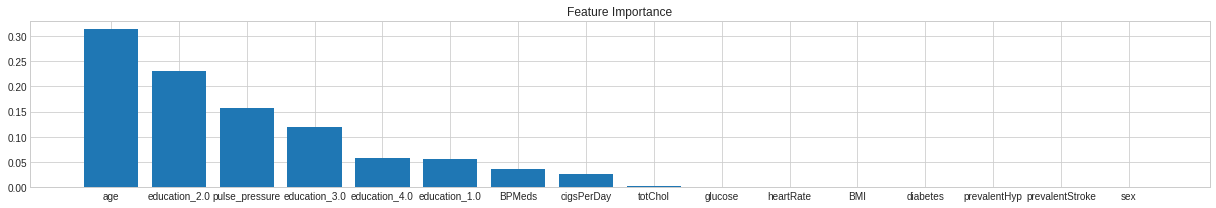

In [ ]:
plt.figure(figsize=(17,3))
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()

##ROC_AUC (Curve)

In [ ]:
knn_probs = clf_knn.predict_proba(X_test)
dt_probs = clf_dt.predict_proba(X_test)
lr_probs = clf_lr.predict_proba(X_test)
nb_probs = clf_nb.predict_proba(X_test)
svc_probs = clf_svc.predict_proba(X_test)
rf_probs = clf_rf.predict_proba(X_test)

In [ ]:
knn_probs = knn_probs[:, 1]
dt_probs = dt_probs[:, 1]
lr_probs = lr_probs[:, 1]
nb_probs = nb_probs[:, 1]
svc_probs = svc_probs[:, 1]
rf_probs = rf_probs[:, 1]

In [ ]:
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
print('K-Nearest Neighbor(KNN): AUROC = %.3f' % (knn_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Support Vector Machine (SVM): AUROC = %.3f' % (svc_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

K-Nearest Neighbor(KNN): AUROC = 0.905
Decision Tree: AUROC = 0.819
Logistic Regression: AUROC = 0.860
Naive Bayes: AUROC = 0.764
Support Vector Machine (SVM): AUROC = 0.863
Random Forest: AUROC = 0.797


In [ ]:
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

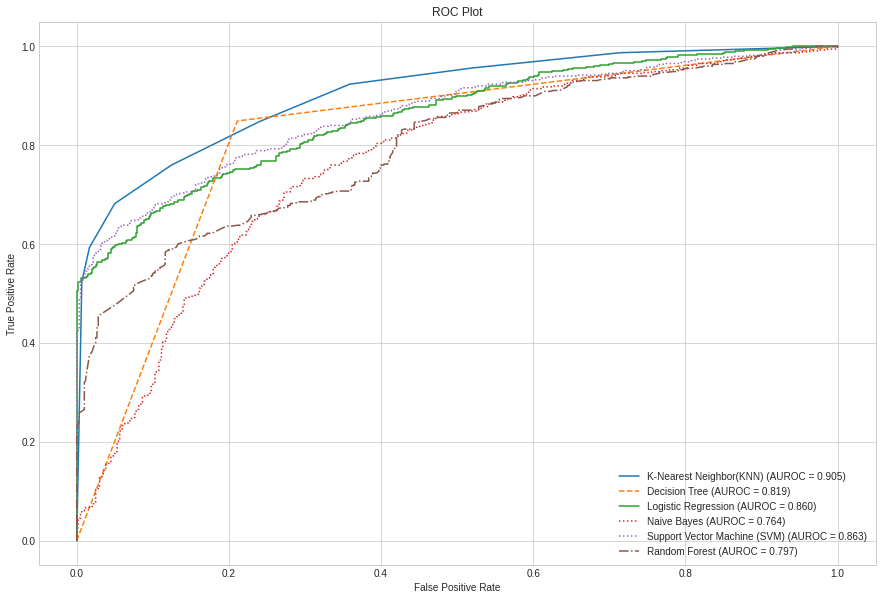

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(knn_fpr, knn_tpr, linestyle = '-', label = 'K-Nearest Neighbor(KNN) (AUROC = %0.3f)'% knn_auc)
plt.plot(dt_fpr, dt_tpr, linestyle = '--', label = 'Decision Tree (AUROC = %0.3f)'% dt_auc)
plt.plot(lr_fpr, lr_tpr, linestyle = '-', label = 'Logistic Regression (AUROC = %0.3f)'% lr_auc)
plt.plot(nb_fpr, nb_tpr, linestyle = ':', label = 'Naive Bayes (AUROC = %0.3f)'% nb_auc)
plt.plot(svc_fpr, svc_tpr, linestyle = ':', label = 'Support Vector Machine (SVM) (AUROC = %0.3f)'% svc_auc)
plt.plot(rf_fpr, rf_tpr, linestyle = '-.', label = 'Random Forest (AUROC = %0.3f)'% rf_auc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Conclusion

*  Age is the biggest factor for the cardiovascular disorders.
*	‘male’, ‘smokers’, patients on BP Medication, with Prevalent Stroke, with Prevalent Hypertension and Diabetic are more prone to heart disease.
*	For Decision Tree and Random Forest Classifiers ‘age’ is most important feature.
*	For Logistic Regression Classifier dummy features of ‘education’ are the top 4 important features.
*	Best performance of Models on test dataset for class 1 (Risk of TenYearCHD):
1. Recall - Decision Tree
2. Precision – SVC
3. F1 Score - Decision Tree
4. Accuracy - K-Nearest Neighbor(KNN)

Best AUROC Score: K-Nearest Neighbor(KNN)

* For covering maximum number of patients who could suffer from any cardiovascular risk in future, a high recall value is required for class 1 in the test dataset. But it will also include few such patient who may not face any risk under (false negative) prediction.
* Under high precision for class 1 several patients who don’t require any treatment would be categorized as patients, while several actual potential patients will be left out.
* In the case of predicting Cardiovascular and such life threatening diseases model with high recall value is preferred.